In [114]:
# This pargammer lost some station
import requests
from bs4 import BeautifulSoup
import re

In [115]:
def cut(pattern, test_string):
    return re.findall(pattern, test_string)

In [116]:
# 爬取地铁线路网址
url_first = 'http://bj.bendibao.com/ditie/linemap.shtml'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.100 Safari/537.36'}
response = requests.get(url_first, headers = headers, allow_redirects = False)
text_wait_for_finding_lines = response.text

In [117]:
subway_line_url_string = 'http://bj.bendibao.com/ditie/map_197.shtml'
pattern_subway_line = re.compile(r'(/ditie/map_\d+.shtml)')

In [118]:
subway_lines_test = list(set(cut(pattern_subway_line,text_wait_for_finding_lines)))

In [119]:
subway_lines = ['http://bj.bendibao.com' + url for url in subway_lines_test]

In [120]:
for i in subway_lines:
    print(i)

http://bj.bendibao.com/ditie/map_198.shtml
http://bj.bendibao.com/ditie/map_200.shtml
http://bj.bendibao.com/ditie/map_208.shtml
http://bj.bendibao.com/ditie/map_203.shtml
http://bj.bendibao.com/ditie/map_201.shtml
http://bj.bendibao.com/ditie/map_205.shtml
http://bj.bendibao.com/ditie/map_197.shtml
http://bj.bendibao.com/ditie/map_254.shtml
http://bj.bendibao.com/ditie/map_253.shtml
http://bj.bendibao.com/ditie/map_199.shtml
http://bj.bendibao.com/ditie/map_202.shtml
http://bj.bendibao.com/ditie/map_209.shtml
http://bj.bendibao.com/ditie/map_206.shtml
http://bj.bendibao.com/ditie/map_346.shtml
http://bj.bendibao.com/ditie/map_212.shtml
http://bj.bendibao.com/ditie/map_211.shtml
http://bj.bendibao.com/ditie/map_207.shtml
http://bj.bendibao.com/ditie/map_210.shtml
http://bj.bendibao.com/ditie/map_204.shtml


In [121]:
pattern_station_untransferable = re.compile(r'<a\s+class="link"\s+href="/ditie/\w+_\w+.shtml"\s+target="_blank">(\w+)</a>') # 不可换乘的正则表达式
pattern_station_transferable = re.compile(r'<a\s+class="link"\s+href="/ditie/\w+_\w+.shtml">(\w+)</a>') # 可换乘的正则表达式

In [122]:
def spider_line_x_station(soup_a,pattern_station_transfer,pattern_station_untransfer):
    '''根据BeautifulSoup中的"a"tag标签内容筛选站点'''
    line_x = []
    
    for line in soup_a:
        station = cut(pattern_station_transfer,str(line))
        
        if len(station) == 0:
            station = cut(pattern_station_untransfer,str(line))
        
        if len(station) != 0:
            line_x.append(station[0])
            
    return line_x

In [123]:
def get_title_name(soup_title):
    return str(soup_title).split(',')[0].lstrip('<title>')[4:-3]

In [124]:
subway_lines_stations = {}
for line_url in subway_lines:
    response = requests.get(line_url)
    line_html = response.text
    
    soup = BeautifulSoup(line_html)
    name = get_title_name(soup.title)
    soup_a = soup.find_all('a')
    
    stations = spider_line_x_station(soup_a,pattern_station_transferable,pattern_station_untransferable)
    subway_lines_stations[name] = stations

In [125]:
subway_lines_stations

{'4号线(M4)': ['安河桥北',
  '北宫门',
  '西苑',
  '圆明园',
  '北京大学东门',
  '中关村',
  '海淀黄庄',
  '人民大学',
  '魏公村',
  '国家图书馆',
  '动物园',
  '西直门',
  '新街口',
  '平安里',
  '西四',
  '灵境胡同',
  '西单',
  '宣武门',
  '菜市口',
  '陶然亭',
  '北京南站',
  '马家堡',
  '角门西',
  '公益西桥',
  '新宫',
  '西红门',
  '高米店北',
  '高米店南',
  '枣园',
  '清源路',
  '黄村西大街',
  '黄村火车站',
  '义和庄',
  '生物医药基地',
  '天宫院'],
 '8号线(M8)': ['朱辛庄',
  '育知路',
  '平西府',
  '回龙观东大街',
  '霍营',
  '育新',
  '西小口',
  '永泰庄',
  '林萃桥',
  '森林公园南门',
  '奥林匹克公园',
  '奥体中心',
  '北土城',
  '安华桥',
  '鼓楼大街',
  '什刹海',
  '南锣鼓巷'],
 '机场线(L1)': ['东直门', '三元桥', 'T3航站楼', 'T2航站楼'],
 '15号线': ['俸伯',
  '顺义',
  '石门',
  '南法信',
  '后沙峪',
  '花梨坎',
  '国展',
  '孙河',
  '马泉营',
  '崔各庄',
  '望京',
  '望京西',
  '关庄',
  '安立路',
  '奥林匹克公园',
  '北沙滩',
  '六道口',
  '清华东路西口'],
 '9号线(M9)': ['郭公庄',
  '丰台科技园',
  '科怡路',
  '丰台南路',
  '丰台东大街',
  '七里庄',
  '六里桥',
  '六里桥东',
  '北京西站',
  '军事博物馆',
  '白堆子',
  '白石桥南',
  '国家图书馆'],
 '昌平线': ['南邵', '沙河高教园', '沙河', '巩华城', '朱辛庄', '生命科学园', '西二旗'],
 '1号线(M1)': ['苹果园',
  '古城',
  '八角游乐园',
  '八宝山',
  '玉泉路',
  '五棵松',

In [126]:
len(subway_lines_stations)

19

In [127]:
import requests
import re

In [128]:
# 获取高德地图中的地铁站店和坐标
url = 'http://map.amap.com/service/subway?_1469083453978&srhdata=1100_drw_beijing.json'

In [129]:
response = requests.get(url)

In [130]:
html_text = response.text

In [131]:
html_text

'{"s":"北京市地铁","o":"1015,660","l":[{"f":[{"li":"900000069871","c":["270 681","243 681","226 681","203 681","180 681","160 681","155 682","152 687","152 696","152 705","152 711","152 724","153 735","153 744","153 753","152 754","150 755","131 755","121 755","104 755"]},{"li":"900000069872","c":["104 760","121 760","131 760","151 760","156 759","158 754","158 744","158 735","158 724","158 711","158 705","158 696","158 688","159 687","161 687","180 687","203 687","226 687","243 687","270 687"]}],"lo":"0","li":"900000069871|900000069872","ln":"S1线","ls":"900000069871","c":["104 758","121 758","131 758","151 758","154 756","155 754","155 744","155 735","155 724","155 711","155 705","155 696","155 687","157 685","161 684","180 684","181 684","203 684","226 684","243 684","270 684"],"cl":"B35A1F","lp":["177 635"],"su":"1","la":"","st":[{"sl":"116.163167,39.923620","sid":"110100023339035","sp":"jin an qiao","udsi":"900000069872015;900000069871002","n":"金安桥","udpx":"270 687;270 681","si":"110100

In [132]:
station_location = {}

In [133]:
def cut(pattern, string):
    return re.findall(pattern, string)

In [134]:
pattern_station = re.compile(r'"sl":"(\d+.\d+),(\d+.\d+)","sid":"\d+","sp":"[\w\s]*","udsi":"\d+;\d+","n":"(\w+)"')

In [135]:
strings = '"sl":"116.363355,39.899433","sid":"110100023098015","sp":"chang chun jie","udsi":"110100023098015;110100023099006","n":"长椿街"'

In [136]:
station_list = cut(pattern_station, html_text)
station_list

[('116.163167', '39.923620', '金安桥'),
 ('116.134010', '39.916030', '四道桥'),
 ('116.125809', '39.912383', '桥户营'),
 ('116.122225', '39.905138', '上岸'),
 ('116.123254', '39.895780', '栗园庄'),
 ('116.114443', '39.890465', '小园'),
 ('116.100334', '39.889378', '石厂'),
 ('116.177388', '39.926727', '苹果园'),
 ('116.190337', '39.907450', '古城'),
 ('116.212684', '39.907442', '八角游乐园'),
 ('116.235948', '39.907440', '八宝山'),
 ('116.252888', '39.907433', '玉泉路'),
 ('116.273987', '39.907456', '五棵松'),
 ('116.294765', '39.907474', '万寿路'),
 ('116.309919', '39.907469', '公主坟'),
 ('116.321459', '39.907422', '军事博物馆'),
 ('116.337583', '39.907379', '木樨地'),
 ('116.352583', '39.907234', '南礼士路'),
 ('116.356866', '39.907242', '复兴门'),
 ('116.374072', '39.907383', '西单'),
 ('116.391278', '39.907472', '天安门西'),
 ('116.401216', '39.907780', '天安门东'),
 ('116.411571', '39.908069', '王府井'),
 ('116.418480', '39.908325', '东单'),
 ('116.435806', '39.908501', '建国门'),
 ('116.450497', '39.908454', '永安里'),
 ('116.461841', '39.909104', '国贸'),
 

In [137]:
for lon, lat, name in station_list:
    if name not in station_location:
        station_location[name] = (float(lon), float(lat))

In [138]:
import math

In [139]:
def geo_distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371
    
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    
    return d

In [140]:
def get_station_distance(station1, station2):
    return geo_distance(station_location[station1], station_location[station2])

In [141]:
get_station_distance('双合','车公庄西')

20.638175569493985

In [142]:
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(3, figsize = (18, 18))
%matplotlib inline

In [143]:
station_graph = nx.Graph()

In [144]:
station_graph.add_nodes_from(list(station_location.keys()))

In [145]:
station_graph.nodes()

NodeView(('金安桥', '四道桥', '桥户营', '上岸', '栗园庄', '小园', '石厂', '苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '建国门', '永安里', '国贸', '大望路', '四惠', '四惠东', '鼓楼大街', '安定门', '雍和宫', '东直门', '东四十条', '朝阳门', '北京站', '崇文门', '前门', '和平门', '宣武门', '长椿街', '阜成门', '车公庄', '天宫院', '生物医药基地', '义和庄', '黄村火车站', '黄村西大街', '清源路', '枣园', '高米店南', '高米店北', '西红门', '新宫', '公益西桥', '角门西', '马家堡', '北京南站', '陶然亭', '菜市口', '灵境胡同', '西四', '平安里', '新街口', '西直门', '动物园', '国家图书馆', '魏公村', '人民大学', '海淀黄庄', '中关村', '北京大学东门', '圆明园', '西苑', '北宫门', '安河桥北', '宋家庄', '刘家窑', '蒲黄榆', '天坛东门', '磁器口', '灯市口', '东四', '张自忠路', '北新桥', '和平里北街', '和平西桥', '惠新西街南口', '惠新西街北口', '大屯路东', '北苑路北', '立水桥南', '立水桥', '天通苑南', '天通苑', '天通苑北', '潞城', '东夏园', '郝家府', '北运河东', '北运河西', '通州北关', '物资学院路', '草房', '常营', '黄渠', '褡裢坡', '青年路', '十里堡', '金台路', '呼家楼', '东大桥', '南锣鼓巷', '北海北', '车公庄西', '白石桥南', '花园桥', '慈寿寺', '海淀五路居', '田村', '廖公庄', '西黄村', '杨庄', '焦化厂', '双合', '垡头', '欢乐谷景区', '南楼梓庄', '化工', '百子湾', '大郊亭', '九龙山', '广渠门外', '广渠门内', '桥湾', '珠

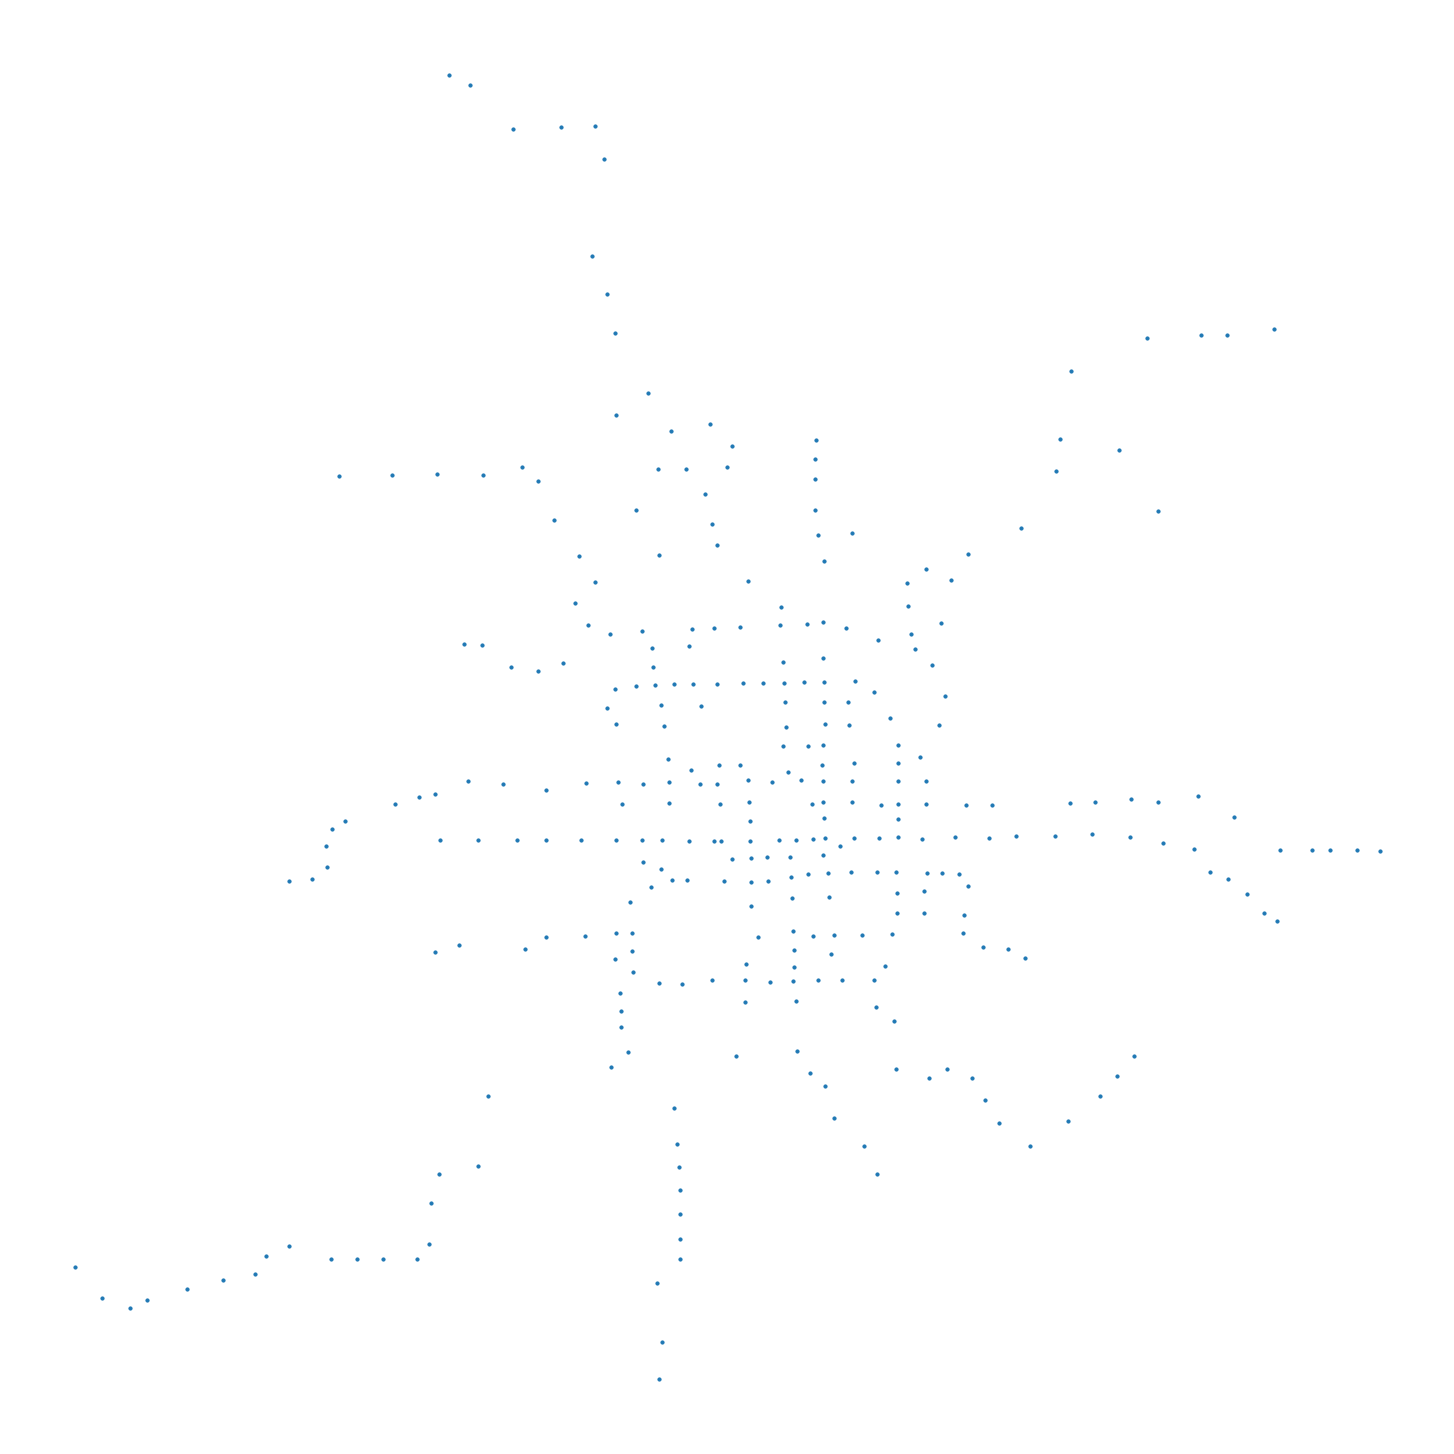

In [146]:
plt.figure(figsize = (20, 20))
nx.draw(station_graph, station_location, node_size = 10)

In [147]:
from collections import defaultdict

In [148]:
stations_connection = defaultdict(list)
stations_connection

defaultdict(list, {})

In [149]:
for line in subway_lines_stations.keys():
    for i,station in enumerate(subway_lines_stations[line][:-1]):
        if station == subway_lines_stations[line][i+1]: continue
        
        if subway_lines_stations[line][i+1] not in stations_connection[station]:
            stations_connection[station].append(subway_lines_stations[line][i+1])
        if station not in stations_connection[subway_lines_stations[line][i+1]]:
            stations_connection[subway_lines_stations[line][i+1]].append(station)

In [150]:
stations_connection['南锣鼓巷']

['什刹海', '北海北', '东四']

In [151]:
stations_graph_connection = nx.Graph(stations_connection)

In [152]:
stations_graph_connection.edges()

EdgeView([('安河桥北', '北宫门'), ('北宫门', '西苑'), ('西苑', '圆明园'), ('圆明园', '北京大学东门'), ('北京大学东门', '中关村'), ('中关村', '海淀黄庄'), ('海淀黄庄', '人民大学'), ('海淀黄庄', '苏州街'), ('海淀黄庄', '知春里'), ('人民大学', '魏公村'), ('魏公村', '国家图书馆'), ('国家图书馆', '动物园'), ('国家图书馆', '白石桥南'), ('动物园', '西直门'), ('西直门', '新街口'), ('西直门', '大钟寺'), ('西直门', '车公庄'), ('新街口', '平安里'), ('平安里', '西四'), ('平安里', '车公庄'), ('平安里', '北海北'), ('西四', '灵境胡同'), ('灵境胡同', '西单'), ('西单', '宣武门'), ('西单', '复兴门'), ('西单', '天安门西'), ('宣武门', '菜市口'), ('宣武门', '长椿街'), ('宣武门', '和平门'), ('菜市口', '陶然亭'), ('菜市口', '广安门内'), ('菜市口', '虎坊桥'), ('陶然亭', '北京南站'), ('北京南站', '马家堡'), ('北京南站', '永定门外'), ('马家堡', '角门西'), ('角门西', '公益西桥'), ('角门西', '角门东'), ('角门西', '草桥'), ('公益西桥', '新宫'), ('新宫', '西红门'), ('西红门', '高米店北'), ('高米店北', '高米店南'), ('高米店南', '枣园'), ('枣园', '清源路'), ('清源路', '黄村西大街'), ('黄村西大街', '黄村火车站'), ('黄村火车站', '义和庄'), ('义和庄', '生物医药基地'), ('生物医药基地', '天宫院'), ('朱辛庄', '育知路'), ('朱辛庄', '巩华城'), ('朱辛庄', '生命科学园'), ('育知路', '平西府'), ('平西府', '回龙观东大街'), ('回龙观东大街', '霍营'), ('霍营', '育新'), ('霍营', '回龙观'), ('霍营', '立水桥'), ('育新', '

In [153]:
station_location['积水潭'] = (116.379185,39.954765)
station_location['车道沟'] = (116.30724,39.951215)

In [154]:
plt.figure(figsize = (200, 200))

<Figure size 14400x14400 with 0 Axes>

<Figure size 14400x14400 with 0 Axes>

In [155]:
import matplotlib.font_manager
plt.rcParams['font.sans-serif'] = ['SimHei']

C:\Users\zhuxiang\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


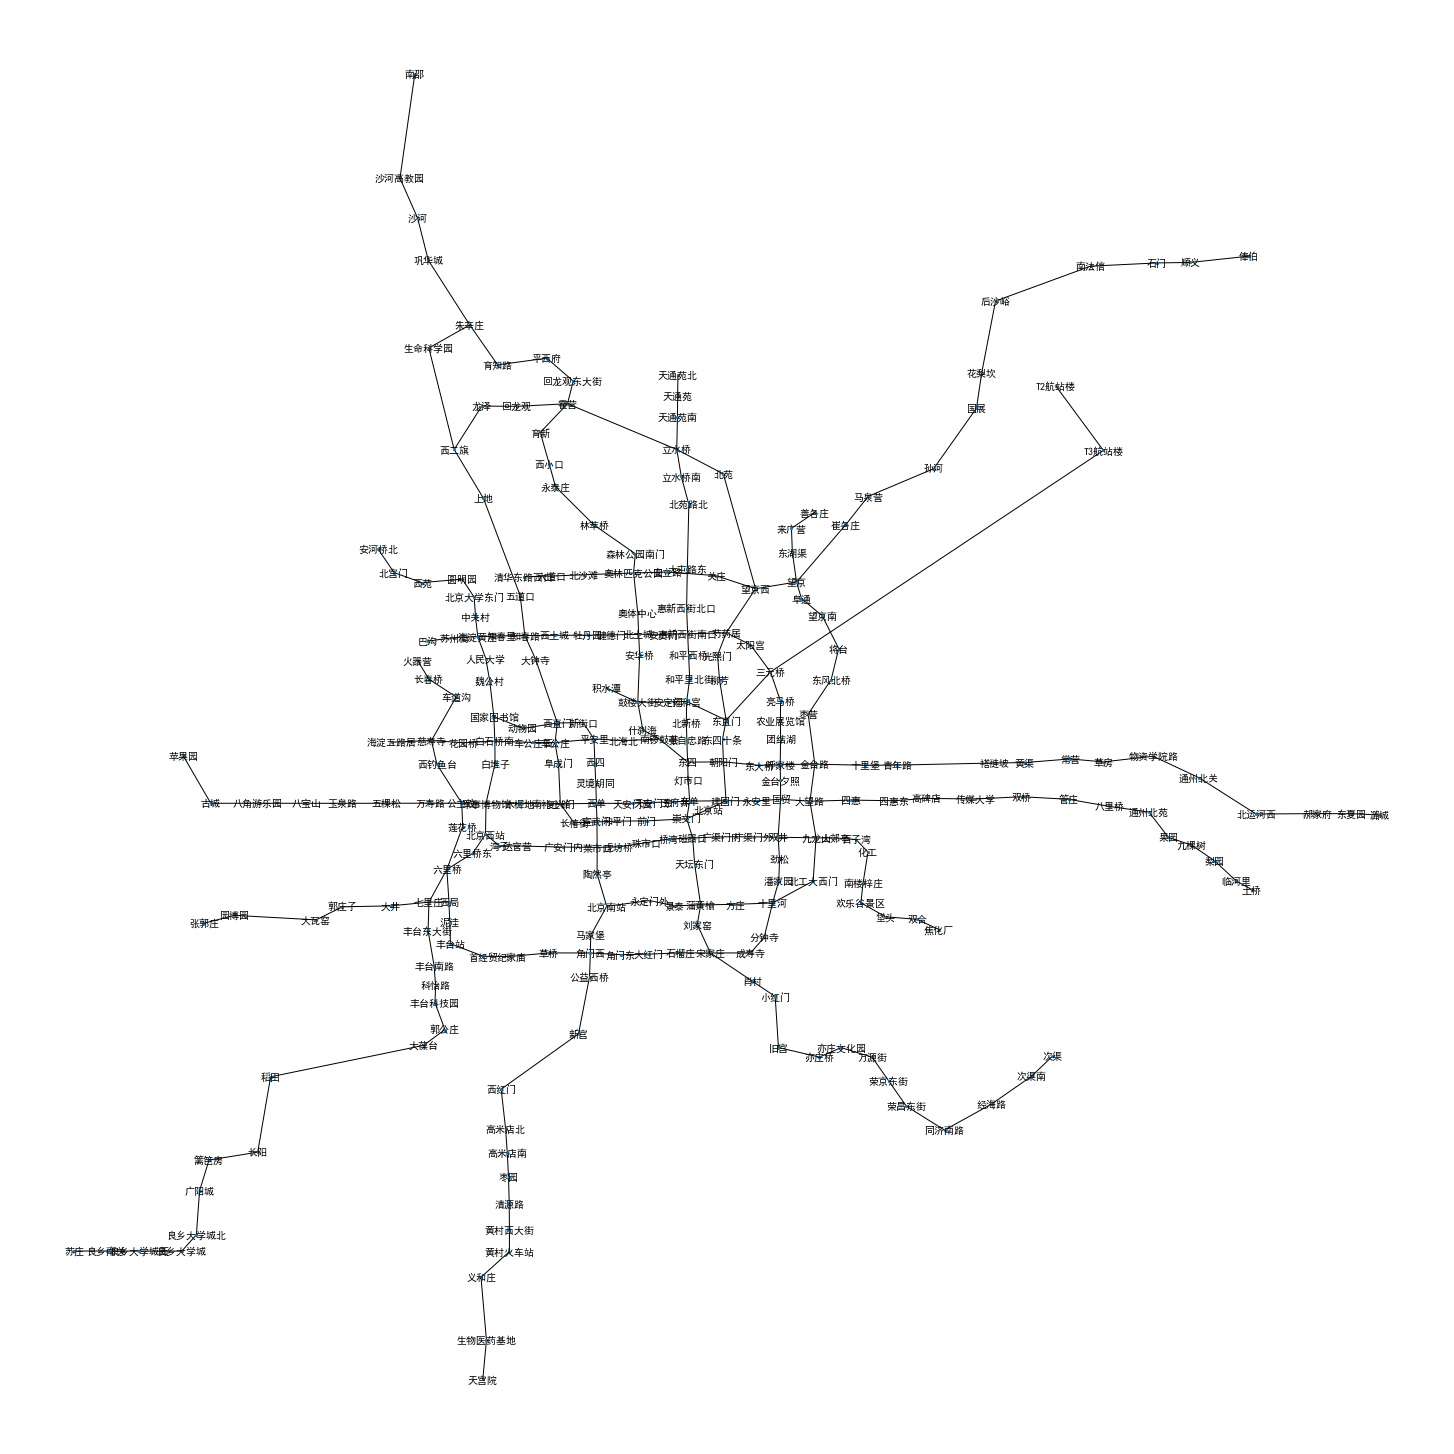

In [156]:
plt.figure(figsize = (20, 20))
nx.draw(stations_graph_connection, station_location, with_labels = True, node_size = 5, font_size = 10)

In [157]:
def stations_less_first(pathes):
    '''换乘最少'''
    return sorted(pathes,key=len)

In [158]:
def shortest_path_first(pathes):
    '''路径最短'''
    if len(pathes) <= 1: return pathes
    
    def get_path_distance(path):
        distance = 0
        for station in path[:-1]:
            distance += get_station_distance(station,path[-1])
    
        return distance
    
    return sorted(pathes,key = get_path_distance)

In [159]:
def search(start,destination,connection_graph = stations_connection,\
            sort_candidate = stations_less_first):
    pathes = [[start]]
    visited = set()
    
    while pathes:
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visited: continue
        
        successor = connection_graph[froninter]
        
        for station in successor:
            if station in visited: continue
            
            new_path = path + [station]
            
            pathes.append(new_path)
            
            if station == destination: return new_path
            
        visited.add(froninter)
        pathes = sort_candidate(pathes)

In [160]:
print(search('车公庄西','双合',sort_candidate = shortest_path_first))

['车公庄西', '车公庄', '平安里', '北海北', '南锣鼓巷', '东四', '朝阳门', '东大桥', '呼家楼', '金台路', '大望路', '九龙山', '大郊亭', '百子湾', '化工', '南楼梓庄', '欢乐谷景区', '垡头', '双合']


In [161]:
print(search('广渠门外','双合'))

['广渠门外', '双井', '九龙山', '大郊亭', '百子湾', '化工', '南楼梓庄', '欢乐谷景区', '垡头', '双合']
